<a href="https://colab.research.google.com/github/pravinraj0001/DataScience/blob/main/Assignment5_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # split the data
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)
print(df)

    Chirps/Second  Ground Temperature
0            20.0                88.6
1            16.0                71.6
2            19.8                93.3
3            18.4                84.3
4            17.1                80.6
5            15.5                75.2
6            14.7                69.7
7            15.7                71.6
8            15.4                69.4
9            16.3                83.3
10           15.0                79.6
11           17.2                82.6
12           16.0                80.6
13           17.0                83.5
14           14.4                76.3


Find the linear regression equation for this data.

In [ ]:
df.isnull().sum()

Chirps/Second         0
Ground Temperature    0
dtype: int64

Checking for outliers

In [ ]:
df.dtypes

Chirps/Second         float64
Ground Temperature    float64
dtype: object

Chart the original data and the equation on the chart.

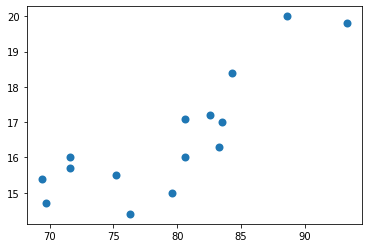

In [ ]:
fig, ax = plt.subplots()
X = df[['Ground Temperature']].values # fts
y = df['Chirps/Second'].values
ax.scatter(X, y, linewidth=2.0)
plt.show()

In [ ]:
df = df.drop_duplicates()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0) # train- test split

In [ ]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

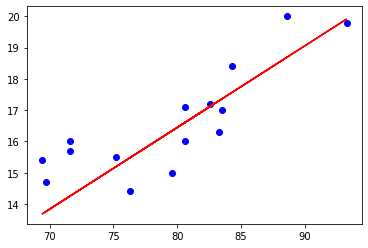

In [ ]:
y_pred = lr.predict(X_test.reshape(-1, 1))
y_pred
plt.scatter(X, y, color='blue')
plt.plot(X, lr.predict(X), color='red')

In [ ]:
print('r-squared: ', lr.score(X, y))

r-squared:  0.6053266625828471


Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?

In [ ]:
lr.predict([[95]])

array([20.35065086])

Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?

In [ ]:
(18 - lr.intercept_) / lr.coef_

array([85.97586169])

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
df = pd.read_fwf("/content/sample_data/brain_body.txt")

Find the linear regression equation for this data for brain weight to body weight.

In [ ]:
lr = linear_model.LinearRegression()
lr.fit(df[['Body']], df['Brain'])
print(' linear regression equation:\n y = {:.4f} * x + {:.4f}'.format(lr.coef_[0], lr.intercept_))

 linear regression equation:
 y = 0.9029 * x + -56.8555


Chart the original data and the equation on the chart.

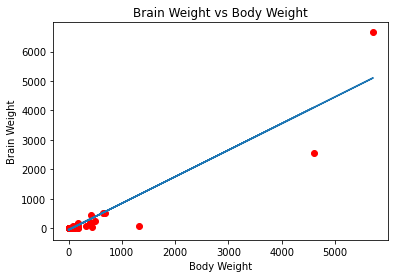

In [ ]:
plt.scatter(df[['Body']], df['Brain'], color='red')
plt.plot(df[['Body']], lr.predict(df[['Body']]))
plt.title('Brain Weight vs Body Weight')
plt.xlabel('Body Weight')
plt.ylabel('Brain Weight')
plt.show()

Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
r2_score = lr.score(df[['Body']], df['Brain'])
print('R2 score is',r2_score)

R2 score is 0.8726620843043331


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [3]:
df = pd.read_fwf("/content/sample_data/salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])


Find the linear regression equation for this data using columns 1-5 to column 6.

In [22]:
lr = linear_model.LinearRegression()
lr.fit(df[list(df.columns[:-1])], df[['Salary']])
print('linear regression equation for this data using columns {} to column 6:\n y = {} * x + {}'.format(df.columns[:-1], lr.coef_, lr.intercept_))

linear regression equation for this data using columns Index(['Sex', 'Rank', 'Year', 'Degree', 'YSdeg'], dtype='object') to column 6:
 y = [[ 1241.7924996   5586.18144952   482.85976783 -1331.64406341
   -128.79057354]] * x + [11410.14654726]


Find the selection of columns with the best  R2  score.

In [34]:
lst = list(df.columns[:-1])
rscore_list = []
for i in range(0,len(lst)):
  lr.fit(df[list(df.columns[:-1-i])], df[['Salary']])
  rscore_list.append(lr.score(df[list(df.columns[:-1-i])], df[['Salary']]))
print("Best R2 score is : ",max(rscore_list))

Best R2 score is :  0.8547180674410969


Report whether sex is a factor in salary.

In [45]:
lr.fit(df[list(df.columns[1:-1])], df[['Salary']])
woScolumn = lr.score(df[list(df.columns[1:-1])], df[['Salary']])
print("Without Sex factor the R2 score is ",woScolumn)
diff = max(rscore_list) - woScolumn
print("Compared to with Sex factor, and without Sex factor\nthe R2 score differs by {} that is {:.2f}%".format(diff,diff*100))
print("Hence sex is not an important factor in salary")

Without Sex factor the R2 score is  0.8485077204335426
Compared to with Sex factor, and without Sex factor
the R2 score differs by 0.0062103470075542955 that is 0.62%
Hence sex is not an important factor in salary
